In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rl-mktng-excercise/events_log.csv


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import gc
import random
import math
import time
import datetime


# import numpy as np
# import pandas as pd

# from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
# from sklearn.metrics import log_loss

# import category_encoders as ce

In [72]:
data00 = pd.read_csv('/kaggle/input/rl-mktng-excercise/events_log.csv') #, parse_dates=['timestamp'])
data00.dtypes

uuid                object
timestamp          float64
session_id          object
group               object
action              object
checkin            float64
page_id             object
n_results          float64
result_position    float64
dtype: object

In [73]:
data01 = data00
data01

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
400160,ffffa98532e154efa821aec083f92674,2.016030e+13,50d4c8dce4b959c3,b,checkin,120.0,be6ad202740eef90,NaN,2.0
400161,ffffbe4347aa5c4facc64fa4a26e73e4,2.016031e+13,056fc33556fcd8c0,b,checkin,10.0,c32a6f39204b8c83,NaN,1.0
400162,ffffc4bd7f8e53a1a86b38874c6728b1,2.016030e+13,f8487a76f255ee62,b,searchResultPage,NaN,b24925ad79226f74,20.0,NaN
400163,ffffe6cffc8d510db61c3f3dce918849,2.016031e+13,daa2d7654ca30c15,b,searchResultPage,NaN,c5d5fe35920a8833,20.0,NaN


In [ ]:
df02 = data01

df02['t'].astype(np.int64)


In [74]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

data01["timestamp2"] = pd.to_datetime(data01.timestamp, format="%Y%m%d%H%M%S")
data01["day"] = data01['timestamp2'].dt.day
data01["day_week"] = data01['timestamp2'].dt.dayofweek # weekday_name()
data01["day_week2"] = data01['day_week'].apply(lambda x: days[x])
data01 = data01[['uuid', 'timestamp', 'timestamp2', 'day', 'day_week', 'day_week2', 'session_id', 'group', 
                 'action', 'checkin','page_id', 'n_results', 'result_position']]
data01.sort_values(["session_id", "timestamp2"], inplace = True)
data01

,uuid,timestamp,timestamp2,day,day_week,day_week2,session_id,group,action,checkin,page_id,n_results,result_position
361077,e6f9280c8df5536490eb925a91979a3b,2.016030e+13,2016-03-03 15:20:45,3,3,Thurs,0000cbcb67c19c45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN
142278,5b394c862bf657d98bcd25589a5247ac,2.016031e+13,2016-03-07 08:49:55,7,0,Mon,0001382e027b2ea4,b,searchResultPage,NaN,7aa28c36c03380a0,18.0,NaN
317464,cae3f7c7ce5d5d28b4bd6d318d962b1b,2.016031e+13,2016-03-07 08:49:58,7,0,Mon,0001382e027b2ea4,b,visitPage,NaN,f88793c95e778898,NaN,1.0
381398,f3e75c59c52251bb9b6585bb04284ee3,2.016031e+13,2016-03-07 08:50:08,7,0,Mon,0001382e027b2ea4,b,checkin,10.0,f88793c95e778898,NaN,1.0
375381,f01620582b615c03812cb1af2e804102,2.016031e+13,2016-03-07 08:50:18,7,0,Mon,0001382e027b2ea4,b,checkin,20.0,f88793c95e778898,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60561,26df6616085a5a49a818da0a49c9308a,2.016031e+13,2016-03-07 09:33:28,7,0,Mon,ffff9adcd8f302d6,a,checkin,20.0,dd76c995ef53d738,NaN,2.0
377109,f1273001273952dca7c215f16ea58c9f,2.016031e+13,2016-03-07 09:33:38,7,0,Mon,ffff9adcd8f302d6,a,checkin,30.0,dd76c995ef53d738,NaN,2.0
136819,57b8c3abbee158cab208917501520567,2.016031e+13,2016-03-07 09:33:48,7,0,Mon,ffff9adcd8f302d6,a,checkin,40.0,dd76c995ef53d738,NaN,2.0
166473,6aa6745e717c53ab93934249f6341066,2.016031e+13,2016-03-07 09:33:58,7,0,Mon,ffff9adcd8f302d6,a,checkin,50.0,dd76c995ef53d738,NaN,2.0


**0. Preprocessing Data:**

In [75]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

zz = data01.sort_values(["timestamp2"]) #, inplace = True)

zz["day_week"] = zz['timestamp2'].dt.dayofweek # weekday_name()
zz["day_week2"] = zz['day_week'].apply(lambda x: days[x])
zz



# df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

# zz["date2"] = pd.to_date(zz.timestamp2) #, format="%Y%m%d%H%M%S")

# zz1 = zz.groupby(["action", "day"]).uuid.count()
# zz["day2"] = zz['timestamp2'].dt.day("%a")
# Series.dt.weekday_name
# day2 = zz['timestamp2'].dt.weekday_name
# day2
# df['day_of_week'] = df['my_dates'].dt.weekday_name

# Series.dt.weekday_name

,uuid,timestamp,timestamp2,day,day_week,day_week2,session_id,group,action,checkin,page_id,n_results,result_position
336011,d6b87ce39b195ca0a5adecc48aaa6276,2.016030e+13,2016-03-01 00:00:01,1,1,Tues,cbba9a98ba7b20cc,a,checkin,60.0,f79f531304a265f8,NaN,4.0
88336,38ae77f3e7145186b2f8631c578e39db,2.016030e+13,2016-03-01 00:00:02,1,1,Tues,cbba9a98ba7b20cc,a,searchResultPage,NaN,1376f8a941d1ce98,20.0,NaN
236956,976a1ff3925a516aba858b8ad20cb9f9,2.016030e+13,2016-03-01 00:00:02,1,1,Tues,c1f0f8499c6655cd,b,checkin,20.0,88bebe600b777ea9,NaN,NaN
72364,2e71e942d17f5999a0e33d2b66b88520,2.016030e+13,2016-03-01 00:00:02,1,1,Tues,614eaa17120fe46b,b,checkin,40.0,756d326815bc60c9,NaN,1.0
80189,3373b4f03236565e8e36c35388831c8a,2.016030e+13,2016-03-01 00:00:05,1,1,Tues,32edcb654a1dee57,b,checkin,150.0,d6122cfa99f1809f,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96075,3d9544d6ba8e5cf09b971fe46696de4f,2.016031e+13,2016-03-08 20:24:26,8,1,Tues,4e2db81835aacb44,a,checkin,20.0,0ddff6d6dfdeddf4,NaN,1.0
342479,dae40192003f5da5a3e9ded97fa4df2e,2.016031e+13,2016-03-08 20:24:26,8,1,Tues,2af4214599ccce0c,a,checkin,20.0,b26b4888cb1ff312,NaN,4.0
210891,86c8602798cd5f66be89d46a336b5f75,2.016031e+13,2016-03-08 20:24:28,8,1,Tues,fa9bd5df98147146,b,searchResultPage,NaN,c8f159b867bf56e1,20.0,NaN
319,002d75cce48954b9ae93fcbb4e77a43c,2.016031e+13,2016-03-08 20:24:29,8,1,Tues,2af4214599ccce0c,a,searchResultPage,NaN,25e37cfbbc987023,19.0,NaN


In [76]:
# General Data metrics:

d01_general = data01.describe(include = "all", datetime_is_numeric=True)
d01_general

# data01.iloc[40950:40960]
# from datetime import datetime

# zz = str(data_01["timestamp"][1])
# # date_string = "20190625091115”
# format_date = datetime.strptime(zz, '%Y%m%d%H%M%S')
# format_date

,uuid,timestamp,timestamp2,day,day_week,day_week2,session_id,group,action,checkin,page_id,n_results,result_position
count,400165,4.001650e+05,400165,400165.000000,400165.000000,400165,400165,400165,400165,223824.000000,400165,136234.000000,230482.000000
unique,400165,NaN,NaN,NaN,NaN,7,68028,2,3,NaN,176371,NaN,NaN
top,ec56f9c822c659cd9c3ee32a04e144dc,NaN,NaN,NaN,NaN,Tues,b254341e78af2f1a,a,checkin,NaN,ffeae9d12ad83b25,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,103453,484,299019,223824,NaN,24,NaN,NaN
mean,NaN,2.016030e+13,2016-03-04 18:39:43.980253696,4.233834,2.542509,NaN,NaN,NaN,NaN,97.190382,NaN,13.210109,2.992798
min,NaN,2.016030e+13,2016-03-01 00:00:01,1.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,0.000000,1.000000
25%,NaN,2.016030e+13,2016-03-02 16:47:05,2.000000,1.000000,NaN,NaN,NaN,NaN,20.000000,NaN,2.000000,1.000000
50%,NaN,2.016030e+13,2016-03-04 12:10:52,4.000000,2.000000,NaN,NaN,NaN,NaN,50.000000,NaN,20.000000,1.000000
75%,NaN,2.016031e+13,2016-03-06 22:01:09,6.000000,4.000000,NaN,NaN,NaN,NaN,150.000000,NaN,20.000000,2.000000
max,NaN,2.016031e+13,2016-03-08 20:24:32,8.000000,6.000000,NaN,NaN,NaN,NaN,420.000000,NaN,500.000000,4103.000000


0.0. Missing Values Analysis:

This dataset contains 400,165 rows and 9 original columns (features). 
Features "uuid", "session_id", "group", "action", "page_id", are categoricals and don´t include missing values.
Feature "timestamp2", is datetime type and doesn´t register missing values.
Features "checkin", "n_results", "result_position", are quantitatives and register "NaN" values, but those ones are not missing or inconsistent values. In these cases, "NaN" values mean "this feature does not apply for this row".

0.1. Identification of Outliers (For Quantitative Features):
 
Outliers in this dataset do not necessarily affect CTR or ZRT calculations, but could be relevant information for other data science tasks. 

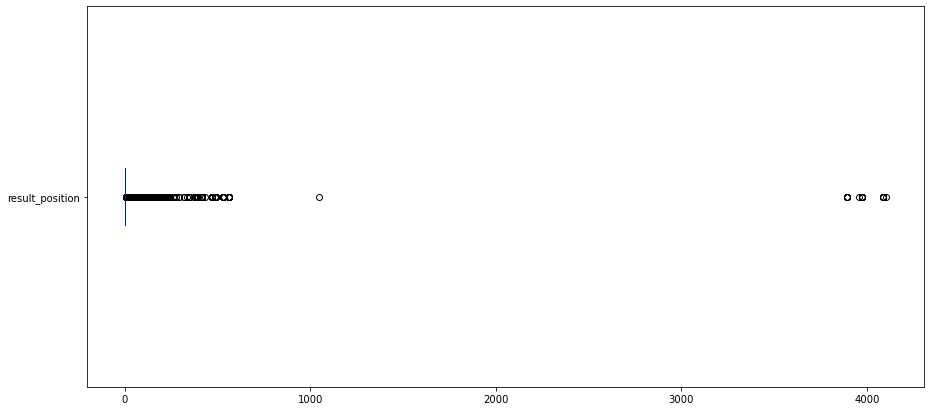

In [77]:
# 0.1.0. Checkin Boxplot:

# ["checkin", "n_results", "result_position"]

data01.result_position.plot(kind = "box", figsize = (15, 7), color = "blue", vert = False)

In [78]:
zz_Q = d01_general.loc["75%","checkin"]
zz_Q

150.0

In [79]:
out_checkin = []
Q1_checkin = d01_general.loc["25%","checkin"]
Q3_checkin = d01_general.loc["75%","checkin"]
ls_checkin = Q3_checkin + (1.5*(Q3_checkin - Q1_checkin))
for i in range(len(data01)):
    if (data01.checkin.iloc[i] > ls_checkin):
        out_checkin.append(data01.uuid.iloc[i])

# outliers_id2 = list(set(outliers_id))

print(len(out_checkin))
print(out_checkin[0:5])

12916
['beeeef1ec2fc5195b9b1c788dbe25929', '7d6db88c851a5656917e4a176425e290', 'fcee8ca466325731945d1dc6eb017935', '74bc70c3332b55ec8d18ab2bc850c73f', '61a5c3ad36f05b1db71dc09e774d4303']


In [80]:
out_nr = []
Q1_nr = d01_general.loc["25%","n_results"]
Q3_nr = d01_general.loc["75%","n_results"]
ls_nr = Q3_nr + (1.5*(Q3_nr - Q1_nr))
for j in range(len(data01)):
    if (data01.n_results.iloc[j] > ls_nr):
        out_nr.append(data01.uuid.iloc[j])

print(len(out_nr))
print(out_nr[20:25])

340
['be8c2272313b5819ac323143c6ec2240', 'aefe78b30023565ba151b9fcb244699f', 'd63ddb099a2a51bcb9723b86750d65ff', '0c5e2a75b99b5636a74df8ccc96dadc6', 'f5eb213486e1522cb9372d77610a6554']


In [81]:
out_rp = []
Q1_rp = d01_general.loc["25%","result_position"]
Q3_rp = d01_general.loc["75%","result_position"]
ls_rp = Q3_rp + (3*(Q3_rp - Q1_rp))
for k in range(len(data01)):
    if (data01.result_position.iloc[k] > ls_rp):
        out_rp.append(data01.uuid.iloc[k])

# outliers_id2 = list(set(outliers_id))

print(len(out_rp))
print(out_rp[0:5])

19083
['4c0f8453754257079692d2a55b4fe232', '51b31a5a14855e1cbef3847a88fc1fb7', 'ce853256170e559d9592db68cb50d7ce', '0bb1b3804e4f55018fa9af832243b3ce', 'db91903f64f852b18930d597e4652a31']


In [82]:
data01["out_checkin"] = data01["uuid"].isin(out_checkin).astype(int)
data01["out_nr"] = data01["uuid"].isin(out_nr).astype(int)
data01["out_rp"] = data01["uuid"].isin(out_rp).astype(int)

outlier = out_checkin + out_nr + out_rp
outlier_id = list(set(outlier))

data01["outliers"] = data01["uuid"].isin(outlier_id).astype(int)
data01
# data01.loc[data01.loc[:, "outliers"] == 1]

,uuid,timestamp,timestamp2,day,day_week,day_week2,session_id,group,action,checkin,page_id,n_results,result_position,out_checkin,out_nr,out_rp,outliers
361077,e6f9280c8df5536490eb925a91979a3b,2.016030e+13,2016-03-03 15:20:45,3,3,Thurs,0000cbcb67c19c45,b,searchResultPage,NaN,fdeeb9aaf0130d41,20.0,NaN,0,0,0,0
142278,5b394c862bf657d98bcd25589a5247ac,2.016031e+13,2016-03-07 08:49:55,7,0,Mon,0001382e027b2ea4,b,searchResultPage,NaN,7aa28c36c03380a0,18.0,NaN,0,0,0,0
317464,cae3f7c7ce5d5d28b4bd6d318d962b1b,2.016031e+13,2016-03-07 08:49:58,7,0,Mon,0001382e027b2ea4,b,visitPage,NaN,f88793c95e778898,NaN,1.0,0,0,0,0
381398,f3e75c59c52251bb9b6585bb04284ee3,2.016031e+13,2016-03-07 08:50:08,7,0,Mon,0001382e027b2ea4,b,checkin,10.0,f88793c95e778898,NaN,1.0,0,0,0,0
375381,f01620582b615c03812cb1af2e804102,2.016031e+13,2016-03-07 08:50:18,7,0,Mon,0001382e027b2ea4,b,checkin,20.0,f88793c95e778898,NaN,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60561,26df6616085a5a49a818da0a49c9308a,2.016031e+13,2016-03-07 09:33:28,7,0,Mon,ffff9adcd8f302d6,a,checkin,20.0,dd76c995ef53d738,NaN,2.0,0,0,0,0
377109,f1273001273952dca7c215f16ea58c9f,2.016031e+13,2016-03-07 09:33:38,7,0,Mon,ffff9adcd8f302d6,a,checkin,30.0,dd76c995ef53d738,NaN,2.0,0,0,0,0
136819,57b8c3abbee158cab208917501520567,2.016031e+13,2016-03-07 09:33:48,7,0,Mon,ffff9adcd8f302d6,a,checkin,40.0,dd76c995ef53d738,NaN,2.0,0,0,0,0
166473,6aa6745e717c53ab93934249f6341066,2.016031e+13,2016-03-07 09:33:58,7,0,Mon,ffff9adcd8f302d6,a,checkin,50.0,dd76c995ef53d738,NaN,2.0,0,0,0,0


0.2. Detection of Inconsistent Values:

In [83]:
dsrp = data01.loc[data01.loc[:,"action"] == "searchResultPage"]
print("Total subset rows: ", dsrp.shape[0], " rows")
dsrp[["checkin", "n_results", "result_position"]].describe(include = "all")


Total subset rows:  136234  rows


,checkin,n_results,result_position
count,0.0,136234.000000,0.0
mean,NaN,13.210109,NaN
std,NaN,13.271104,NaN
min,NaN,0.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,20.000000,NaN
75%,NaN,20.000000,NaN
max,NaN,500.000000,NaN


Registros asociados a la categoría "action = searchResultPage":

El cuadro precedente muestra que no existen valores inconsistentes en las variables cuantitativas asociadas a esta acción. De hecho, lo que se espera, y efectivamente ocurre dentro de este subconjunto, es que las variables "checkin" y "result_position" sólo registran valores"NaN", mientras que la variable "n_results" no registra valores "NaN".


In [84]:
dvp = data01.loc[data01.loc[:,"action"] == "visitPage"]
print("Total subset rows: ", dvp.shape[0], " rows") # dvp
dvp[["checkin", "n_results", "result_position"]].describe(include = "all")

Total subset rows:  40107  rows


,checkin,n_results,result_position
count,0.0,0.0,34079.00000
mean,NaN,NaN,4.03665
std,NaN,NaN,51.28016
min,NaN,NaN,1.00000
25%,NaN,NaN,1.00000
50%,NaN,NaN,1.00000
75%,NaN,NaN,2.00000
max,NaN,NaN,4103.00000


Registros asociados a la categoría "action = visitPage":

El cuadro precedente muestra que las variables "checkin" y "n_results" sólo registran valores"NaN", lo cual se corresponde con el comportamiento esperado de esta categoría.
Por otra parte, de un total de 40,107 filas que conforman este subset, sólo 34,079 filas registran valores válidos en la variable "result_position" (85,0%). Esto puede deberse a casos donde los usuarios acceden a páginas directamente (sin hacer uso del SERP). Tomando en cuenta esta posibilidad, se asume que este subset no presenta inconsistencias de valores. 

In [85]:
dchp = data01.loc[data01.loc[:,"action"] == "checkin"]
print("Total subset rows: ", dchp.shape[0], " rows") # dvp
dchp[["checkin", "n_results", "result_position"]].describe(include = "all")

Total subset rows:  223824  rows


,checkin,n_results,result_position
count,223824.000000,0.0,196403.000000
mean,97.190382,NaN,2.811673
std,104.593714,NaN,35.890508
min,10.000000,NaN,1.000000
25%,20.000000,NaN,1.000000
50%,50.000000,NaN,1.000000
75%,150.000000,NaN,2.000000
max,420.000000,NaN,4087.000000


Registros asociados a la categoría "action = checkin":

El cuadro precedente muestra que:
La variable "checkin" no registra valores "NaN",  y la variable "n_results" sólo registra valores "NaN", lo que se corresponde con el comportamiento esperado de estas variables dentro de ésta categoría.
Por otra parte, de un total de 223,824 filas que conforman este subset, sólo 196,403 filas registran valores válidos en la variable "result_position" (87,7%). Esto puede deberse a los checkin registrados en páginas a las que los usuarios accedieron directamente (sin hacer uso del SERP). Tomando en cuenta esta posibilidad, se asume que este subset no presenta inconsistencias de valores.

0.3. Resumen Resultado Preprocesamiento:
a. No se detectaron valores pérdidos.
b. Se identificaron 31,604 filas que describen un comportamiento atípico (outlayers), que equivalen al 7,9% del total de filas evaluadas
c. No se detectaron inconsistencias de valores según las categorías de la variable "action".

1. Answer to questions:

1.1. What is the daily overall clickthrough rate? How does it vary between the groups?

1.1.1. What is the daily overall clickthrough rate?

In [86]:
# sss = Total Selected Search Sessions
# tss = Total Search Sessions
# CTR = sss/tss

sss0 = data01.loc[data01.loc[:,"action"] == "visitPage"] # .shape[0] # value_counts()
sss = sss0.loc[sss0.loc[:,"result_position"] >= 1].shape[0] # value_counts()

tss = data01.loc[data01.loc[:,"action"] == "searchResultPage"].shape[0] # value_counts()

CTR = sss/tss
print("sss: ", sss)
print("tss: ", tss)
print("CTR: ", CTR)

sss:  34079
tss:  136234
CTR:  0.25015047638621785


In [89]:
sss01

,uuid,timestamp,timestamp2,day,day_week,day_week2,session_id,group,action,checkin,page_id,n_results,result_position,out_checkin,out_nr,out_rp,outliers
317464,cae3f7c7ce5d5d28b4bd6d318d962b1b,2.016031e+13,2016-03-07 08:49:58,7,0,Mon,0001382e027b2ea4,b,visitPage,NaN,f88793c95e778898,NaN,1.0,0,0,0,0
232576,948f3c30cb585a2db33f61b6c637905e,2.016031e+13,2016-03-05 09:24:30,5,5,Sat,0001e8bb90445cb2,b,visitPage,NaN,35ee99beb4fb05f0,NaN,1.0,0,0,0,0
320184,cca28777a66553b78538b6891c4e2d32,2.016031e+13,2016-03-05 07:42:37,5,5,Sat,00064fe774048046,a,visitPage,NaN,ea25cebe2f182853,NaN,1.0,0,0,0,0
343068,db4529b762a15acc9b88950e7739f603,2.016030e+13,2016-03-03 16:56:32,3,3,Thurs,0007b7f6b575feb6,a,visitPage,NaN,ce7ba13e4b8a6414,NaN,1.0,0,0,0,0
302580,c14f48a027f65e8884bb89d8303c9d76,2.016030e+13,2016-03-02 17:25:40,2,2,Weds,000b72561100b509,b,visitPage,NaN,866e6f24fe7a3e78,NaN,5.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27696,11d310d1bb1c5109a06f4f97cd55442c,2.016030e+13,2016-03-03 21:25:13,3,3,Thurs,fffa1d5e2c608ba6,a,visitPage,NaN,5f980897ef504ea6,NaN,1.0,0,0,0,0
394620,fc5e5c3dff925135a24912d8f0e7dc03,2.016030e+13,2016-03-04 09:21:29,4,4,Fri,fffa88acebf831c8,a,visitPage,NaN,6de31b2254c96310,NaN,1.0,0,0,0,0
110180,4698f17fccd4543b8c95093249566e32,2.016030e+13,2016-03-04 09:27:45,4,4,Fri,fffa88acebf831c8,a,visitPage,NaN,1742aa9591b28f2b,NaN,1.0,0,0,0,0
381536,f3fdb1871a85593d84ceeeb465939836,2.016030e+13,2016-03-01 15:07:25,1,1,Tues,fffb978cc690214c,b,visitPage,NaN,40b23622fedad58a,NaN,1.0,0,0,0,0


In [102]:
# sss = Total Selected Search Sessions
# tss = Total Search Sessions
# CTR = sss/tss

# sss:
sss01 = dvp.loc[dvp.loc[:,"result_position"] >= 1] #.shape[0] # value_counts()
sss = sss01["uuid"].groupby([sss01['timestamp2'].dt.day, sss01['day_week2']]).count()

# tss:
tss = dsrp["uuid"].groupby([dsrp['timestamp2'].dt.day, dsrp['day_week2']]).count() # .tolist()

# CTR:
dic_ctr = {"sss": sss, "tss": tss}
df_ctr = pd.DataFrame(dic_ctr)
df_ctr["ctr"] = df_ctr["sss"]/df_ctr["tss"]
print("daily overall CTR = ", df_ctr["ctr"].sum()/df_ctr["ctr"].count())
print(df_ctr)

daily overall CTR =  0.25050758331524764
                       sss    tss       ctr
timestamp2 day_week2                       
1          Tues       4477  18374  0.243660
2          Weds       4595  18902  0.243096
3          Thurs      4823  19159  0.251735
4          Fri        4294  16675  0.257511
5          Sat        3322  13204  0.251590
6          Sun        3756  14612  0.257049
7          Mon        4714  19011  0.247962
8          Tues       4098  16297  0.251457


1.1.2. How does it vary between the groups?

In [131]:
# sss = Total Selected Search Sessions
# tss = Total Search Sessions
# CTR = sss/tss

# sss:
# sss01 = dvp.loc[dvp.loc[:,"result_position"] >= 1] #.shape[0] # value_counts()
sss_g = sss01["uuid"].groupby([sss01['group'], sss01['timestamp2'].dt.day, sss01['day_week2']]).count()

# tss:
tss_g = dsrp["uuid"].groupby([dsrp['group'], dsrp['timestamp2'].dt.day, dsrp['day_week2']]).count() # .tolist()

# CTR:
dic_ctr_g = {"sss": sss_g, "tss": tss_g}
df_ctr_g = pd.DataFrame(dic_ctr_g)
df_ctr_g["ctr"] = df_ctr_g["sss"]/df_ctr_g["tss"]

# Filtering groups:
df_ctr_a = df_ctr_g[np.in1d(df_ctr_g.index.get_level_values(0), ['a'])]
df_ctr_b = df_ctr_g[np.in1d(df_ctr_g.index.get_level_values(0), ['b'])]

# Computing overall daily CTR by groups and their % differences (variation): 
ctr_a = df_ctr_a["ctr"].sum()/df_ctr_a["ctr"].count()
ctr_b = df_ctr_b["ctr"].sum()/df_ctr_b["ctr"].count()
var_a_b = 100*((ctr_a/ctr_b)-1)

# Detail daily CTR per groups:
print("daily overall CTR for group 'a' = ", ctr_a)
print("\ndaily overall CTR for group 'b' = ", ctr_b)
print("\nVariation (percent) = ", var_a_b)
if (var_a_b >= 0):
    print("\nCTR in group 'a' is ", var_a_b, "% bigger than CTR in group 'b'")
elif (var_a_b < 0):
        print("\nCTR in group 'a' is ", var_a_b, "% lower than CTR in group 'b'")
else:
        print("\nError - Cannot compute difference among groups")

print("\nDayly CTR for group 'a':")
print(df_ctr_a)
print("\nDayly CTR for group 'b':")
print(df_ctr_b)

daily overall CTR for group 'a' =  0.2968597946455961

daily overall CTR for group 'b' =  0.15377471143368807

Variation (percent) =  93.04851355459074

CTR in group 'a' is  93.04851355459074 % bigger than CTR in group 'b'

Dayly CTR for group 'a':
                             sss    tss       ctr
group timestamp2 day_week2                       
a     1          Tues       3779  12582  0.300350
      2          Weds       3868  13209  0.292831
      3          Thurs      4042  13280  0.304367
      4          Fri        3381  11298  0.299257
      5          Sat        2512   8612  0.291686
      6          Sun        2899   9469  0.306157
      7          Mon        3610  12699  0.284274
      8          Tues       3228  10907  0.295957

Dayly CTR for group 'b':
                             sss   tss       ctr
group timestamp2 day_week2                      
b     1          Tues        698  5792  0.120511
      2          Weds        727  5693  0.127701
      3          Thurs       

1.2. Which results do people tend to try first? How does it change day-to-day?


1.2.1. Which results do people tend to try first?

In [ ]:
rp.groupby(['group', 'action']).count()


# df.groupby(['Animal']).mean()

In [ ]:
data01.dtypes